In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
from scipy.stats import zscore
%matplotlib inline

In [2]:
file=pd.read_csv('/Users/Daksha Singhal/Desktop/Dream Hokage/Sem-3/2. Data Science/Project/1645 E ROOSEVELT ST-CENTRAL PHOENIX STN-2.csv')

In [3]:
no2_mean=[];no2_aqi=[];o3_mean=[];o3_aqi=[];so2_mean=[];so2_aqi=[];co_mean=[];co_aqi=[];
year=['2000','2001','2002','2003','2004','2005','2006','2007']
for i in year:
    no2_aqi.append((file.loc[file['Date Local'].str.contains(i),'NO2 AQI']).mean())
    no2_mean.append((file.loc[file['Date Local'].str.contains(i),'NO2 Mean']).mean())
    o3_mean.append((file.loc[file['Date Local'].str.contains(i),'O3 Mean']).mean())
    o3_aqi.append((file.loc[file['Date Local'].str.contains(i),'O3 AQI']).mean())
    so2_mean.append((file.loc[file['Date Local'].str.contains(i),'SO2 Mean']).mean())
    so2_aqi.append((file.loc[file['Date Local'].str.contains(i),'SO2 AQI']).mean())
    co_mean.append((file.loc[file['Date Local'].str.contains(i),'CO Mean']).mean())
    co_aqi.append((file.loc[file['Date Local'].str.contains(i),'CO AQI']).mean())

In [4]:
c=file.corr()
c.to_csv('/Users/Daksha Singhal/Desktop/Dream Hokage/Sem-3/2. Data Science/Project/corr.csv')

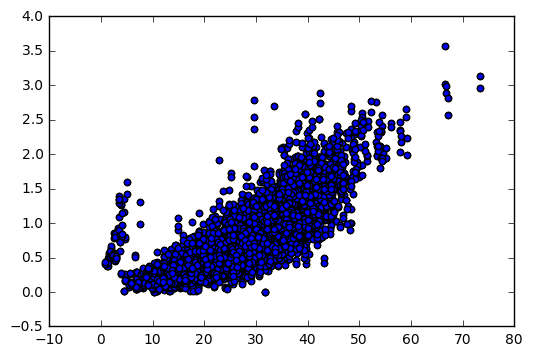

In [9]:
plt.scatter(file['NO2 Mean'],file['CO Mean'])

In [9]:
num=[1,2,3,4,5,6,7,8]
sns.set()
ax=sns.lineplot(x=num, y="NO2 Mean", data=file)

x=[1,2,3,4,5,6,7,8]
plt.bar(x,so2_mean,align='center')
plt.xticks(x, year)
plt.ylabel('SO2 Mean')
plt.xlabel('Year')
plt.show()
x=[1,2,3,4,5,6,7,8]
plt.bar(x,co_mean,align='center')
plt.xticks(x, year)
plt.ylabel('CO Mean')
plt.xlabel('Year')
plt.show()
x=[1,2,3,4,5,6,7,8]
plt.bar(x,o3_mean,align='center')
plt.xticks(x, year)
plt.ylabel('O3 Mean')
plt.xlabel('Year')
plt.show()
x=[1,2,3,4,5,6,7,8]
plt.bar(x,no2_aqi,align='center')
plt.xticks(x, year)
plt.ylabel('NO2 AQI')
plt.xlabel('Year')
plt.show()
x=[1,2,3,4,5,6,7,8]
plt.bar(x,so2_aqi,align='center')
plt.xticks(x, year)
plt.ylabel('SO2 AQI')
plt.xlabel('Year')
plt.show()
x=[1,2,3,4,5,6,7,8]
plt.bar(x,co_aqi,align='center')
plt.xticks(x, year)
plt.ylabel('CO AQI')
plt.xlabel('Year')
plt.show()
x=[1,2,3,4,5,6,7,8]
plt.bar(x,o3_aqi,align='center')
plt.xticks(x, year)
plt.ylabel('O3 AQI')
plt.xlabel('Year')
plt.show()

NameError: name 'sns' is not defined

In [ ]:
no2_hr=[];o3_hr=[];co_hr=[];so2_hr=[];
for i in range(1,25):
    no2_hr.append(file.loc[file['NO2 1st Max Hour']==i,['NO2 1st Max Hour']].count()[0])
x=[i for i in range(1,25)]
plt.bar(x,no2_hr,align='center')
plt.xticks(x,x)
plt.ylabel('1st Max Value' )
plt.xlabel('1st Max Hour')
plt.title('NO2 1st Max Hour')
plt.show()

for i in range(1,25):
    o3_hr.append(file.loc[file['O3 1st Max Hour']==i,['O3 1st Max Hour']].count()[0])
plt.bar(x,o3_hr,align='center')
plt.xticks(x,x)
plt.ylabel('1st Max Value' )
plt.xlabel('1st Max Hour')
plt.title('O3 1st Max Hour')
plt.show()

for i in range(1,25):
    co_hr.append(file.loc[file['CO 1st Max Hour']==i,['CO 1st Max Hour']].count()[0])
plt.bar(x,co_hr,align='center')
plt.xticks(x,x)
plt.ylabel('1st Max Value' )
plt.xlabel('1st Max Hour')
plt.title('CO 1st Max Hour')
plt.show()

for i in range(1,25):
    so2_hr.append(file.loc[file['SO2 1st Max Hour']==i,['SO2 1st Max Hour']].count()[0])
plt.bar(x,so2_hr,align='center')
plt.xticks(x,x)
plt.ylabel('1st Max Value' )
plt.xlabel('1st Max Hour')
plt.title('SO2 1st Max Hour')
plt.show()

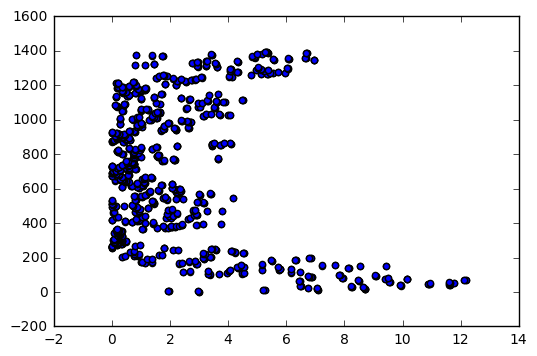

In [33]:
#plt.boxplot(file.loc[file['Date Local'].str.contains('2000'),['NO2 Mean']])
plt.scatter(file.loc[file['Date Local'].str.contains('2000'),['SO2 Mean']],
            [x for x in range(1,1+file.loc[file['Date Local'].str.contains('2000'),['SO2 Mean']].count()[0])])


In [37]:
def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False
    

alpha = 0.05
sample_mean = file.loc[file['Date Local'].str.contains('2005'),'NO2 Mean'].mean()
pop_mean = file['NO2 Mean'].mean()
sample_size =  file.loc[file['Date Local'].str.contains('2005'),['NO2 Mean']].count()[0]
std_dev = file.loc[file['Date Local'].str.contains(i),'NO2 Mean'].std()

print('H0 : μ =', pop_mean)
print('H1 : μ !=', pop_mean)
print('alpha value is :', alpha, '\n')

reject = two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis.Thereforewe cannot say if NO2 mean of 8 years is equal to NO2 of 2005 ')
else:
    print('Failed to reject NULL hypothesis.Therefore it is plausible that  NO2 mean of 8 years is equal to NO2 of 2005 ')

H0 : μ = 27.100953176971586
H1 : μ != 27.100953176971586
alpha value is : 0.05 

actual z value : 1.95996398454
hypothesis z value : -2.870250743114447 

Reject NULL hypothesis.Thereforewe cannot say if NO2 mean of 8 years is equal to NO2 of 2005 


In [42]:
def npp(data):
    data = sorted(data)
    p = [(data.index(i)-0.5)/len(data) for i in data]
    z = zscore(p)
    plt.scatter(data, z)
    plt.ylabel('orginal values')
    plt.xlabel('theortical values(zscores)')
    plt.show()
    
npp(file.loc[file.loc[file['Date Local'].str.contains('2000'),['SO2 Mean']]])

ValueError: Cannot index with multidimensional key

In [12]:
file.loc[file['Date Local'].str.contains(i),'NO2 Mean'].count()[0]

IndexError: invalid index to scalar variable.

In [35]:
((file.loc[file['Date Local'].str.contains('2002'),'SO2 AQI']).mean()-(file.loc[file['Date Local'].str.contains('2004'),'SO2 AQI']).mean())*100/(file.loc[file['Date Local'].str.contains('2004'),'SO2 AQI']).mean()

32.82734510905927